In [1]:
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [36]:
def scatter(data: np.ndarray, centers):
    '''
    Scatters it
    :param data: ndarray, the data source
    :param centers, centers found by k-means
    '''
    # more generally I should get the header and ...
    x = data[:, 0]
    y = data[:, 1]
    plt.scatter(x, y)
    plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='red', s=150)
    
    plt.title("dataset scatter Plot")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


def elbow(data, max_k: int):
    '''
    Plots the elbow diagram in order to find out the best "k" in k-means
    :param data, the dataset on which k-means is applied
    :param max_k, k starts from two till max_k
    '''
    clustering_errors = np.zeros(max_k)
    for k in range(1, max_k + 1):
        obj = kmeans(data.to_numpy(), k, 20)
        clusters, centers = obj.cluster()
        clustering_error = obj.clustering_error(clusters, centers)
        clustering_errors[k - 1] = clustering_error

    plt.plot(np.array(range(1, max_k + 1)), clustering_errors)
    plt.title("clustering error for different number of clusters")
    plt.xlabel("number of clusters")
    plt.ylabel("clustering error")
    plt.show()


class kmeans:
    def __init__(self, data: np.ndarray, k: int, iteration: int):
        self.data = data
        self.k = k  # number of clusters
        self.iteration = iteration
        self.n = data.shape[0]  # number of data
        self.c = data.shape[1]  # number of features in the data
        self.colors = ['blue', 'green', 'orange', 'purple']

    def plus_plus(self):
        # Create cluster centroids using the k-means++ algorithm.
        centroids = [self.data[0]]

        for _ in range(1, self.k):
            dist_sq = np.array([min([np.inner(c - x, c - x) for c in centroids]) for x in self.data])
            probs = dist_sq / dist_sq.sum()
            cumulative_probs = probs.cumsum()
            r = np.random.rand()

            i = 0
            for j, p in enumerate(cumulative_probs):
                if r < p:
                    i = j
                    break

            centroids.append(self.data[i])

        return np.array(centroids)

    # It sometimes leads to an error because the cluster of an initial center may become empty
    def initial_centers(self):
        # Generate random centers using Gaussian distribution
        mean = np.mean(self.data, axis=0)
        std = np.std(self.data, axis=0)
        centers = np.random.randn(self.k, self.c) * std + mean
        return centers

        # plt.scatter(data[:, 0], data[:, 1], s=7)
        # plt.scatter(centers[:, 0], centers[:, 1], marker='*', c='g', s=150)
        # plt.show()

    def clustering_error(self, final_clusters, final_centers):
        cluster_errors = np.zeros(self.k)
        for i in range(self.k):
            norm = np.linalg.norm(self.data[final_clusters == i] - final_centers[i], axis=1)
            m = np.mean(norm, axis=0)
            cluster_errors[i] = m
            # print("cluster error for cluster {} is {}".format(self.colors[i], m))

        clustering_error = np.mean(cluster_errors)
        print("clustering error is {}".format(clustering_error))
        return clustering_error

    def show(self, final_clusters, final_centers):
        # plot data points
        for i in range(self.n):
            plt.scatter(self.data[i, 0], self.data[i, 1], s=7, color=self.colors[final_clusters[i]])
        # plot centers
        for i in range(self.k):
            plt.scatter(final_centers[i, 0], final_centers[i, 1], marker='*', c=self.colors[i], s=150)
        plt.title("K-Means on Dataset, rounds={}, k={}".format(self.iteration, self.k))
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.show()

    def cluster(self, show=False) -> [np.ndarray, np.ndarray]:
        centers = self.plus_plus()
        centers_new = deepcopy(centers)

        clusters = np.zeros(self.n)
        distances = np.zeros((self.n, self.k))
        sse = np.zeros(self.iteration)

        for j in range(self.iteration):
            for i in range(self.k):
                distances[:, i] = np.linalg.norm(self.data - centers[i], axis=1)
            clusters = np.argmin(distances, axis=1)

            if show:
                scatter(self.data, centers_new)
                print(distances[0:5])
                print(np.amin(distances[0:5], axis=1))
                print(np.sum(np.amin(distances, axis=1)))
                sse[j] = np.sum(np.amin(distances, axis=1))
            
            for i in range(self.k):
                centers_new[i] = np.mean(self.data[clusters == i], axis=0)
        
        if show:
            plt.plot(np.array(range(1, self.iteration + 1)), sse)
            plt.title("SSE for different iterations")
            plt.xlabel("number of iterations")
            plt.ylabel("SSE")
            plt.show()
                                
        return clusters, centers_new

**SSE**

clustering error is 3.6699776138481983
clustering error is 3.6777539528166887
clustering error is 3.052999735207631
clustering error is 2.6923778138628327
clustering error is 2.3794998722236285


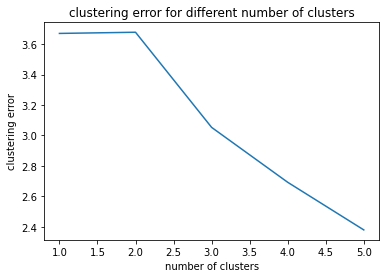

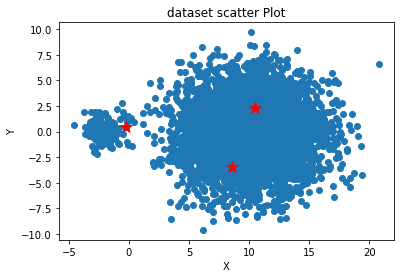

[[ 0.          9.61492583 10.87322701]
 [ 2.00125638 11.16062126 11.49050392]
 [ 1.38131845  9.04650352 11.09809278]
 [ 0.98321162 10.1711016  11.77804149]
 [ 1.8673002  11.35187663 12.71425943]]
[0.         2.00125638 1.38131845 0.98321162 1.8673002 ]
15072.306243578776


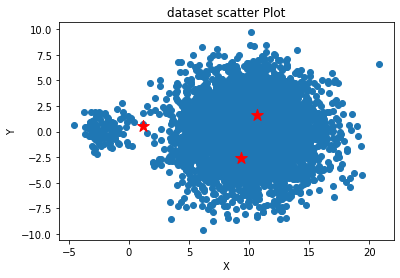

[[ 0.          9.61492583 10.87322701]
 [ 2.00125638 11.16062126 11.49050392]
 [ 1.38131845  9.04650352 11.09809278]
 [ 0.98321162 10.1711016  11.77804149]
 [ 1.8673002  11.35187663 12.71425943]]
[0.         2.00125638 1.38131845 0.98321162 1.8673002 ]
15072.306243578776


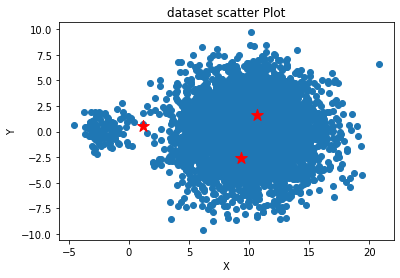

[[ 0.          9.61492583 10.87322701]
 [ 2.00125638 11.16062126 11.49050392]
 [ 1.38131845  9.04650352 11.09809278]
 [ 0.98321162 10.1711016  11.77804149]
 [ 1.8673002  11.35187663 12.71425943]]
[0.         2.00125638 1.38131845 0.98321162 1.8673002 ]
15072.306243578776


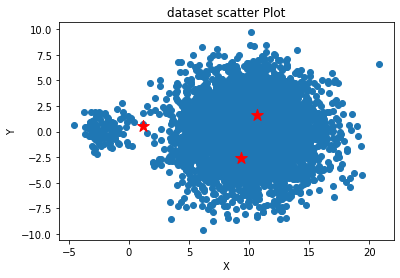

[[ 0.          9.61492583 10.87322701]
 [ 2.00125638 11.16062126 11.49050392]
 [ 1.38131845  9.04650352 11.09809278]
 [ 0.98321162 10.1711016  11.77804149]
 [ 1.8673002  11.35187663 12.71425943]]
[0.         2.00125638 1.38131845 0.98321162 1.8673002 ]
15072.306243578776


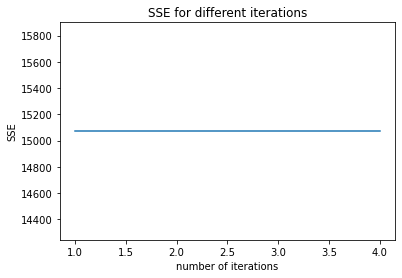

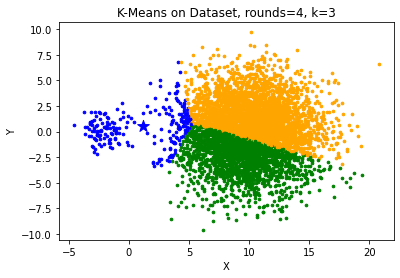

In [37]:
data1 = pd.read_csv("q1-data/data_kmeans_1.csv", header=None)
elbow(data1, 5)
obj = kmeans(data1.to_numpy(), 3, 4)
clusters, centers = obj.cluster(True)
obj.show(clusters, centers)

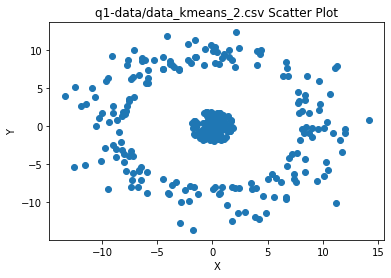

clustering error is 6.788897377358728
clustering error is 5.7018923746576515
clustering error is 4.800043669692235
clustering error is 4.34707766752661
clustering error is 3.423109647248971


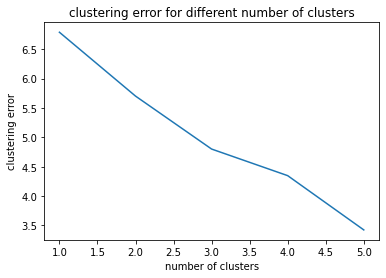

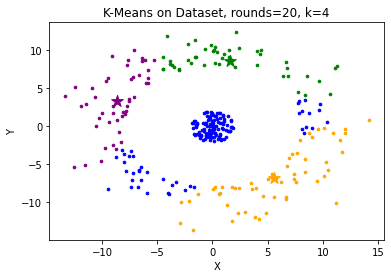

In [9]:
scatter("q1-data/data_kmeans_2.csv")

data1 = pd.read_csv("q1-data/data_kmeans_2.csv", header=None)
elbow(data1, 5)
obj = kmeans(data1.to_numpy(), 4, 20)
clusters, centers = obj.cluster()
obj.show(clusters, centers)

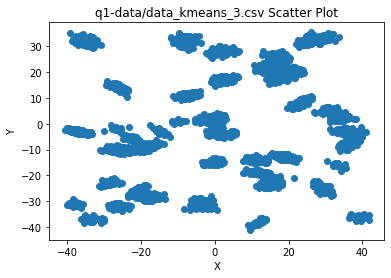

clustering error is 27.80514045992794
clustering error is 22.776440791318393
clustering error is 18.24504815444973
clustering error is 13.55145911939989
clustering error is 13.566769591306755


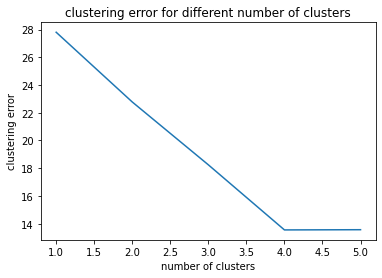

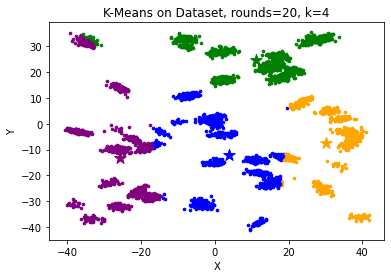

In [10]:
scatter("q1-data/data_kmeans_3.csv")

data1 = pd.read_csv("q1-data/data_kmeans_3.csv", header=None)
elbow(data1, 5)
obj = kmeans(data1.to_numpy(), 4, 20)
clusters, centers = obj.cluster()
obj.show(clusters, centers)